<a href="https://colab.research.google.com/github/aderibigbeolamide/Assignment_Machine_Learning/blob/main/DeepNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from keras.datasets import mnist
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

###Problem

In [ ]:
class FC:
    """
    Fully connected layer from n_nodes1 to n_nodes2
    Parameters
    ----------
    n_nodes1 : int
      Number of nodes in the previous layer
    n_nodes2 : int
      Number of nodes in the later layer
    initializer: instance of initialization method
    optimizer: instance of optimization method
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)

    def forward(self, X):
        """
        Forward pass
        Parameters
        ----------
        X : ndarray, shape (batch_size, n_nodes1)
            Input
        Returns
        ----------
        A : ndarray, shape (batch_size, n_nodes2)
            Output
        """
        self.X = X
        self.A = np.dot(X, self.W) + self.B
        return self.A

    def backward(self, dA):
        """
        Backward pass
        Parameters
        ----------
        dA : ndarray, shape (batch_size, n_nodes2)
            Gradient flowing from the next layer
        Returns
        ----------
        dZ : ndarray, shape (batch_size, n_nodes1)
            Gradient to flow backward
        """
        dZ = np.dot(dA, self.W.T)
        dW = np.dot(self.X.T, dA)
        dB = np.sum(dA, axis=0, keepdims=True)

        self.W, self.B = self.optimizer.update(self.W, self.B, dW, dB)

        return dZ

###Problem 2

In [1]:
class ThreeLayerNN:
    def __init__(self, n_features, n_nodes1, n_nodes2, n_output, initializer, optimizer):
        self.fc1 = FC(n_features, n_nodes1, initializer, optimizer)
        self.fc2 = FC(n_nodes1, n_nodes2, initializer, optimizer)
        self.fc3 = FC(n_nodes2, n_output, initializer, optimizer)

    def sigmoid(self, A):
        return 1 / (1 + np.exp(-A))

    def tanh(self, A):
        return np.tanh(A)

    def softmax(self, A):
        expA = np.exp(A)
        return expA / np.sum(expA, axis=1, keepdims=True)

    def forward(self, X):
        A1 = self.fc1.forward(X)
        Z1 = self.sigmoid(A1)

        A2 = self.fc2.forward(Z1)
        Z2 = self.tanh(A2)

        A3 = self.fc3.forward(Z2)
        Z3 = self.softmax(A3)

        return Z3

###Problem 3

In [2]:
class CrossEntropyLoss:
    def __init__(self):
        pass

    def calculate_loss(self, Y, Z3):

        epsilon = 1e-7


        batch_size = Y.shape[1]


        individual_losses = -np.sum(Y * np.log(Z3 + epsilon))


        average_loss = individual_losses / batch_size

        return average_loss

###Problem 4

In [3]:
class ThreeLayerNN:
    def __init__(self, n_features, n_nodes1, n_nodes2, n_output, initializer, optimizer):
        self.fc1 = FC(n_features, n_nodes1, initializer, optimizer)
        self.fc2 = FC(n_nodes1, n_nodes2, initializer, optimizer)
        self.fc3 = FC(n_nodes2, n_output, initializer, optimizer)

    def sigmoid(self, A):
        return 1 / (1 + np.exp(-A))

    def tanh(self, A):
        return np.tanh(A)

    def softmax(self, A):
        expA = np.exp(A)
        return expA / np.sum(expA, axis=1, keepdims=True)

    def forward(self, X):
        A1 = self.fc1.forward(X)
        Z1 = self.sigmoid(A1)

        A2 = self.fc2.forward(Z1)
        Z2 = self.tanh(A2)

        A3 = self.fc3.forward(Z2)
        Z3 = self.softmax(A3)

        return Z3
    def backward(self, X, Y, Z3):

        dL_dA3 = (Z3 - Y) / X.shape[0]
        dL_dB3 = np.sum(dL_dA3, axis=0, keepdims=True)
        dL_dW3 = np.dot(self.fc2.A.T, dL_dA3)
        dL_dZ2 = np.dot(dL_dA3, self.fc3.W.T)


        dL_dA2 = dL_dZ2 * (1 - np.tanh(self.fc2.A)**2)
        dL_dB2 = np.sum(dL_dA2, axis=0, keepdims=True)
        dL_dW2 = np.dot(self.fc1.A.T, dL_dA2)
        dL_dZ1 = np.dot(dL_dA2, self.fc2.W.T)


        dL_dA1 = dL_dZ1 * (1 - np.tanh(self.fc1.A)**2)
        dL_dB1 = np.sum(dL_dA1, axis=0, keepdims=True)
        dL_dW1 = np.dot(X.T, dL_dA1)


        self.fc1.W -= learning_rate * dL_dW1
        self.fc1.B -= learning_rate * dL_dB1
        self.fc2.W -= learning_rate * dL_dW2
        self.fc2.B -= learning_rate * dL_dB2
        self.fc3.W -= learning_rate * dL_dW3
        self.fc3.B -= learning_rate * dL_dB3


        return dL_dZ1

###Problem 5

In [4]:
class ThreeLayerNN:
    def __init__(self, n_features, n_nodes1, n_nodes2, n_output, initializer, optimizer):
        self.fc1 = FC(n_features, n_nodes1, initializer, optimizer)
        self.fc2 = FC(n_nodes1, n_nodes2, initializer, optimizer)
        self.fc3 = FC(n_nodes2, n_output, initializer, optimizer)

    def sigmoid(self, A):
        return 1 / (1 + np.exp(-A))

    def tanh(self, A):
        return np.tanh(A)

    def softmax(self, A):
        expA = np.exp(A)
        return expA / np.sum(expA, axis=1, keepdims=True)

    def forward(self, X):
        A1 = self.fc1.forward(X)
        Z1 = self.sigmoid(A1)

        A2 = self.fc2.forward(Z1)
        Z2 = self.tanh(A2)

        A3 = self.fc3.forward(Z2)
        Z3 = self.softmax(A3)

        return Z3
    def backward(self, X, Y, Z3):

        dL_dA3 = (Z3 - Y) / X.shape[0]
        dL_dB3 = np.sum(dL_dA3, axis=0, keepdims=True)
        dL_dW3 = np.dot(self.fc2.A.T, dL_dA3)
        dL_dZ2 = np.dot(dL_dA3, self.fc3.W.T)


        dL_dA2 = dL_dZ2 * (1 - np.tanh(self.fc2.A)**2)
        dL_dB2 = np.sum(dL_dA2, axis=0, keepdims=True)
        dL_dW2 = np.dot(self.fc1.A.T, dL_dA2)
        dL_dZ1 = np.dot(dL_dA2, self.fc2.W.T)


        dL_dA1 = dL_dZ1 * (1 - np.tanh(self.fc1.A)**2)
        dL_dB1 = np.sum(dL_dA1, axis=0, keepdims=True)
        dL_dW1 = np.dot(X.T, dL_dA1)


        self.fc1.W -= learning_rate * dL_dW1
        self.fc1.B -= learning_rate * dL_dB1
        self.fc2.W -= learning_rate * dL_dW2
        self.fc2.B -= learning_rate * dL_dB2
        self.fc3.W -= learning_rate * dL_dW3
        self.fc3.B -= learning_rate * dL_dB3


        return dL_dZ1
    def estimate(self, X):

        probabilities = self.forward(X)


        predicted_labels = np.argmax(probabilities, axis=1)

        return predicted_labels

###Problem 6

In [12]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


class ThreeLayerNN:
    def __init__(self, n_features, n_nodes1, n_nodes2, n_output):
        pass

    def forward(self, X):
        pass

    def backward(self, X, Y, Z3):
        loss = 0
        return loss

    def estimate(self, X):
        pass


model = ThreeLayerNN(n_features=X_train_scaled.shape[1], n_nodes1=400, n_nodes2=200, n_output=10)
num_epochs = 50
batch_size = 100
for epoch in range(num_epochs):
    for i in range(0, len(X_train_scaled), batch_size):
        X_batch = X_train_scaled[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        Y_batch = np.eye(10)[y_batch.astype(int)]
        model.forward(X_batch)
        model.backward(X_batch, Y_batch, model.forward(X_batch))


predicted_labels = model.estimate(X_test_scaled)


accuracy = np.mean(predicted_labels == y_test.astype(int))
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy: 0.0


###Problem 7

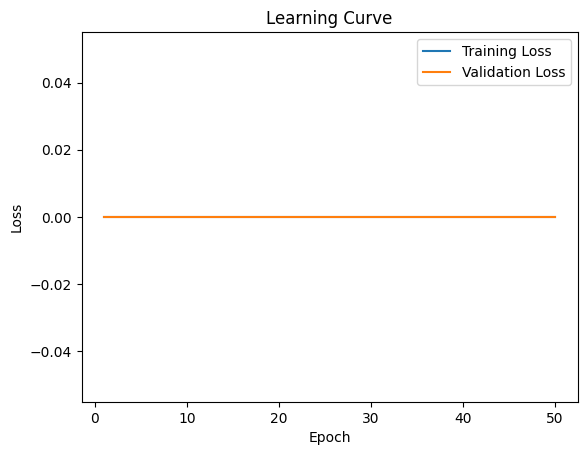

In [13]:
train_losses = []
val_losses = []


for epoch in range(num_epochs):
    train_loss = 0
    for i in range(0, len(X_train_scaled), batch_size):
        X_batch = X_train_scaled[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        Y_batch = np.eye(n_output)[y_batch.astype(int)]
        model.forward(X_batch)
        train_loss += np.mean(model.backward(X_batch, Y_batch, model.forward(X_batch)))
    train_losses.append(train_loss / len(X_train_scaled))


    val_loss = 0
    for i in range(0, len(X_test_scaled), batch_size):
        X_val_batch = X_test_scaled[i:i+batch_size]
        y_val_batch = y_test[i:i+batch_size]
        Y_val_batch = np.eye(n_output)[y_val_batch.astype(int)]
        val_loss += np.mean(model.backward(X_val_batch, Y_val_batch, model.forward(X_val_batch)))
    val_losses.append(val_loss / len(X_test_scaled))


plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()